In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import subprocess

from IPython.display import Image
from IPython.display import display

from tinybatrees import visualization as tree_view
from tinybatrees import persistence as tree_io

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_boston

boston_housing = load_boston()

In [3]:
X = boston_housing.data[:,[5,12]].astype('float32')
y = boston_housing.target.astype('float32')

X.shape, y.shape

((506, 2), (506,))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 2), (404,), (102, 2), (102,))

In [5]:
from sklearn.ensemble import RandomForestRegressor

rforest_reg = RandomForestRegressor(random_state=42, n_estimators=3, max_depth=2)
rforest_reg.fit(X_train, y_train)

rforest_reg.score(X_test, y_test)

0.6908944285744887

In [6]:
rf_trees = [e.tree_ for e in rforest_reg.estimators_]
features = {0: 'avg no. of rooms', 1: 'lower population status (%)'}

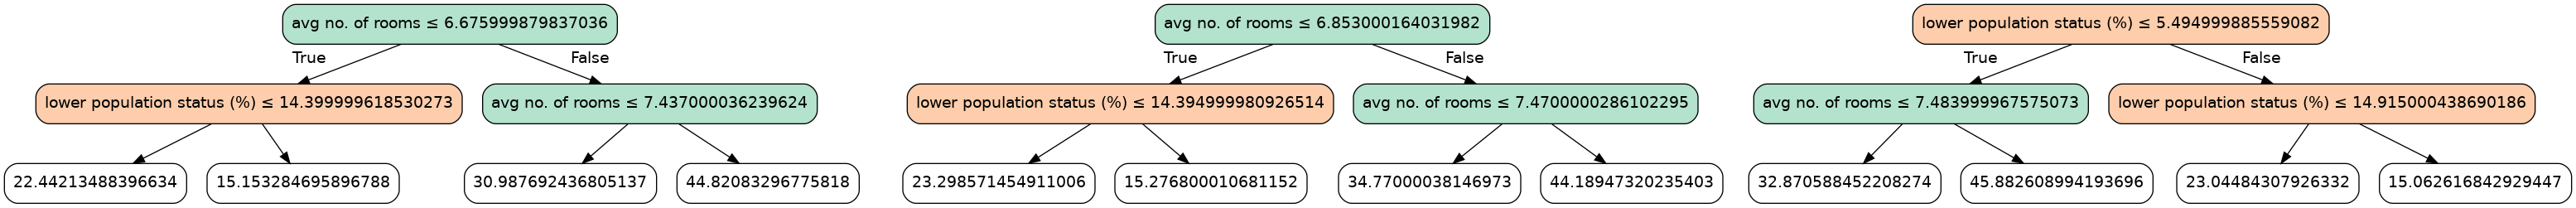

In [7]:
display(Image(tree_view.create_graph(rf_trees, features=features, regression=True).create_png()))

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(ax, clf, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()].astype('float32')
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#91c8ff', '#8fecff','#e0ff7a','#ff9d94'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    sc = None
    if plot_training:
        sc = ax.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y, cmap=plt.get_cmap("jet"))
        ax.axis(axes)
    ax.set_xlabel("Average no. of rooms", fontsize=14)
    ax.set_ylabel("Lower population status (%)", fontsize=14)
    return sc

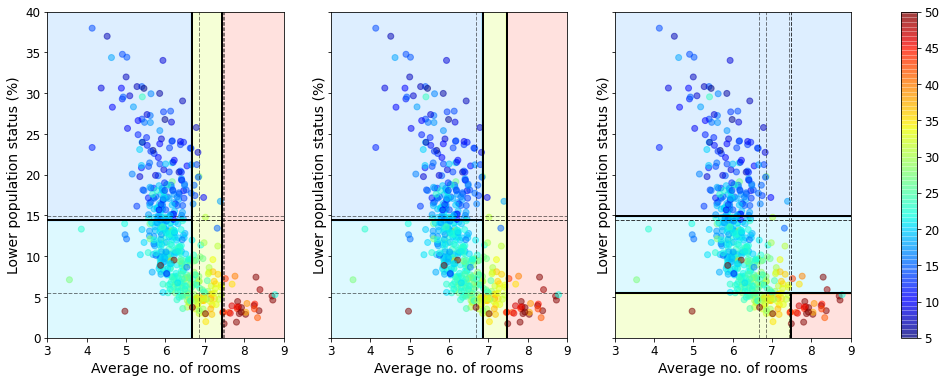

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i in range(3):
    sc = plot_decision_boundary(axs[i], rf_trees[i], X, y, axes=[3, 9, 0, 40], plot_training=True)
    axs[i].plot([6.68, 6.68], [0, 40], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([7.44, 7.44], [0, 40], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([3, 9], [14.4, 14.4], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([6.85, 6.85], [0, 40], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([7.47, 7.47], [0, 40], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([3, 9], [14.4, 14.4], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([7.48, 7.48], [0, 40], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([3, 9], [5.5, 5.5], "k--", linewidth=1, alpha=0.5)
    axs[i].plot([3, 9], [14.92, 14.92], "k--", linewidth=1, alpha=0.5)

fig.colorbar(sc, ax=axs.ravel().tolist())

axs[0].plot([6.68, 6.68], [0, 40], "k-", linewidth=2)
axs[0].plot([7.44, 7.44], [0, 40], "k-", linewidth=2)
axs[0].plot([3, 6.68], [14.4, 14.4], "k-", linewidth=2)

axs[1].plot([6.85, 6.85], [0, 40], "k-", linewidth=2)
axs[1].plot([7.47, 7.47], [0, 40], "k-", linewidth=2)
axs[1].plot([3, 6.85], [14.4, 14.4], "k-", linewidth=2)

axs[2].plot([7.48, 7.48], [0, 5.5], "k-", linewidth=2)
axs[2].plot([3, 9], [5.5, 5.5], "k-", linewidth=2)
axs[2].plot([3, 9], [14.92, 14.92], "k-", linewidth=2)



In [10]:
from tinybatrees import BornAgainTree, RandomForest

random_forest = RandomForest("../data/Boston.RF1.txt")

ba_tree = BornAgainTree(random_forest)
ba_tree.build_optimal()

ba_tree.export("Boston.tree", print_content=True)

DATASET_NAME: dataset_name
ENSEMBLE: BA
NB_TREES: 1
NB_FEATURES: 2
NB_CLASSES: 1
MAX_TREE_DEPTH: 5
Format: node / node type(LN - leave node, IN - internal node) left child / right child / feature / threshold / node_depth / average target ('nan' if internal node)

[TREE 0]
NB_NODES: 39
0 IN 1 16 0 6.85 0 nan
1 IN 2 9 0 6.68 1 nan
2 IN 3 6 1 14.4 2 nan
3 IN 4 5 1 5.49 3 nan
4 LN -1 -1 -1 -1 4 26.203333333333333
5 LN -1 -1 -1 -1 4 22.926666666666666
6 IN 7 8 1 14.92 3 nan
7 LN -1 -1 -1 -1 4 17.823333333333334
8 LN -1 -1 -1 -1 4 15.163333333333334
9 IN 10 13 1 14.4 2 nan
10 IN 11 12 1 5.49 3 nan
11 LN -1 -1 -1 -1 4 29.05333333333333
12 LN -1 -1 -1 -1 4 25.776666666666667
13 IN 14 15 1 14.92 3 nan
14 LN -1 -1 -1 -1 4 23.103333333333335
15 LN -1 -1 -1 -1 4 20.44333333333333
16 IN 17 24 0 7.44 1 nan
17 IN 18 21 1 14.4 2 nan
18 IN 19 20 1 5.49 3 nan
19 LN -1 -1 -1 -1 4 32.876666666666665
20 LN -1 -1 -1 -1 4 29.600000000000005
21 IN 22 23 1 14.92 3 nan
22 LN -1 -1 -1 -1 4 29.600000000000005
23 

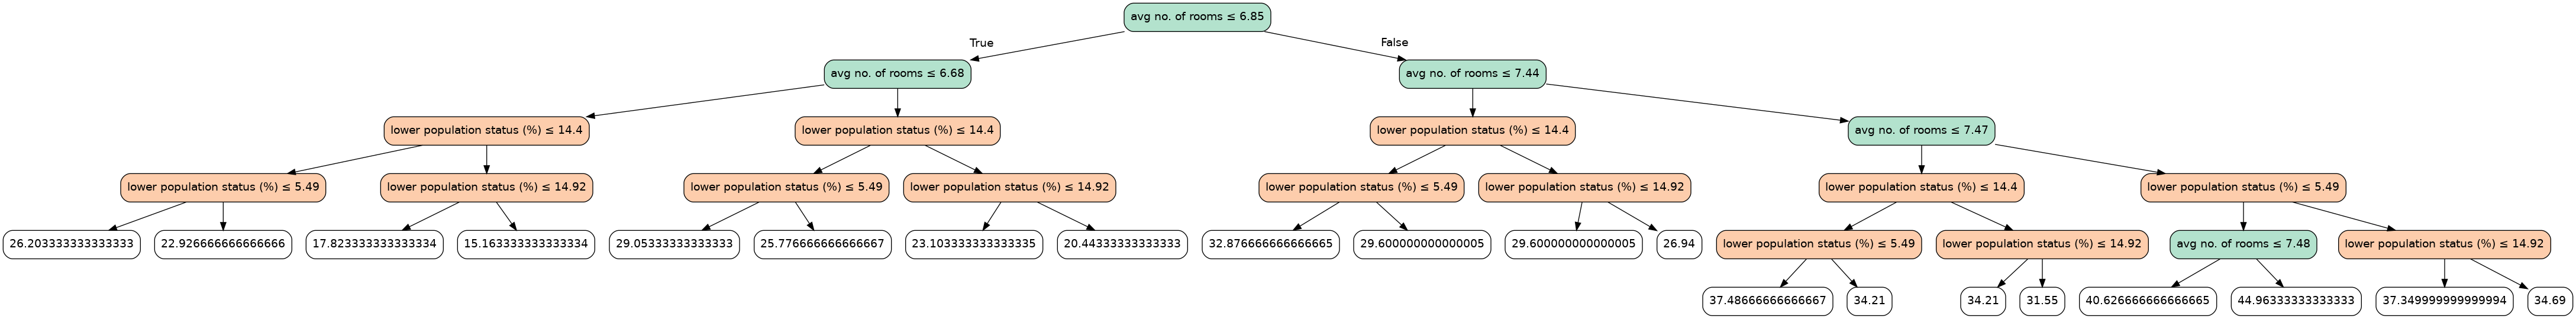

In [11]:
py_born_again = tree_io.regressor_from_file("Boston.tree", X_train, y_train, pruning=False)
display(Image(tree_view.create_graph([py_born_again.tree_], features=features, regression=True).create_png()))

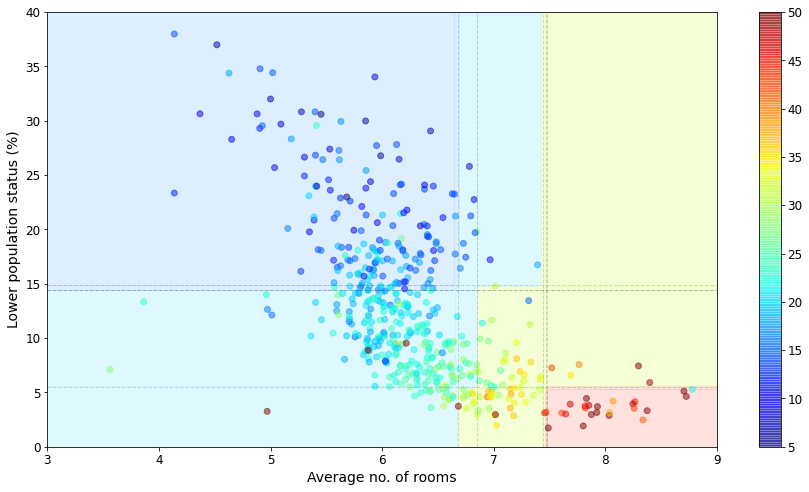

In [12]:
fig, axs = plt.subplots(1, figsize=(15,8))

sc = plot_decision_boundary(axs, py_born_again, X, y, axes=[3, 9, 0, 40], plot_training=True)
fig.colorbar(sc, ax=[axs])

axs.plot([6.68, 6.68], [0, 40], "k--", linewidth=1, alpha=0.15)
axs.plot([7.44, 7.44], [0, 40], "k--", linewidth=1, alpha=0.15)
axs.plot([3, 9], [14.4, 14.4], "k--", linewidth=1, alpha=0.15)
axs.plot([6.85, 6.85], [0, 40], "k--", linewidth=1, alpha=0.15)
axs.plot([7.47, 7.47], [0, 40], "k--", linewidth=1, alpha=0.15)
axs.plot([3, 9], [14.4, 14.4], "k--", linewidth=1, alpha=0.15)
axs.plot([7.48, 7.48], [0, 40], "k--", linewidth=1, alpha=0.15)
axs.plot([3, 9], [5.5, 5.5], "k--", linewidth=1, alpha=0.15)
axs.plot([3, 9], [14.92, 14.92], "k--", linewidth=1, alpha=0.15)

In [18]:
rforest_reg.score(X_test, y_test), py_born_again.score(X_test, y_test)

(0.6908944285744887, 0.6909012343047034)

In [19]:
import pandas as pd
from sklearn.metrics import mean_squared_error

rf_test_pred = rforest_reg.predict(X_test)
rf_train_pred = rforest_reg.predict(X_train)
report_rf = mean_squared_error(y_test, rf_test_pred)
report_rf_train = mean_squared_error(y_train, rf_train_pred)

ba_test_pred = py_born_again.predict(X_test)
ba_train_pred = py_born_again.predict(X_train)
report_ba = mean_squared_error(y_test, ba_test_pred)
report_ba_train = mean_squared_error(y_train, ba_train_pred)

df = {' ': [], 'Train-MSE': [], 'Test-MSE': []}
def add_report(df, method, train_stat, test_stat):
    df[' '].append(method)
    df['Train-MSE'].append(train_stat)
    df['Test-MSE'].append(test_stat)

add_report(df, 'RandomForest', report_rf_train, report_rf)
add_report(df, 'BornAgain', report_ba_train, report_ba)

pd.DataFrame(data=df, index=None)

,,Train-MSE,Test-MSE
0,RandomForest,22.652399,22.667881
1,BornAgain,22.588553,22.667382
